In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "D:/에어비앤비/파리/listings.csv"
df = pd.read_csv(path)

In [4]:
print(df.shape)
df.head()

(84397, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240316023852,2024-03-19,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,f,1,1,0,0,0.05
1,165409,https://www.airbnb.com/rooms/165409,20240316023852,2024-03-19,city scrape,studio charme Haut Marais PARIS,You'll love this typical parisian flat.,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,788732,...,4.89,4.95,4.74,7510309597559,f,1,1,0,0,0.69
2,5396,https://www.airbnb.com/rooms/5396,20240316023852,2024-03-18,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.58,7510402838018,f,2,1,1,0,2.19
3,166370,https://www.airbnb.com/rooms/166370,20240316023852,2024-03-16,city scrape,Big appartment with view 4 people,"2 Bedrooms apartment for up to 4 people, with ...",The avenue is located nearby the animated dist...,https://a0.muscache.com/pictures/74224563/6c9e...,793032,...,4.79,4.65,4.48,7511007974397,f,1,1,0,0,0.51
4,39948,https://www.airbnb.com/rooms/39948,20240316023852,2024-03-19,previous scrape,COSY INDEPENDENT ROOM IN CENTRAL PARIS,Large newly-renovated guest room in central Pa...,"Located in the heart of Paris, The Montorgueil...",https://a0.muscache.com/pictures/f898fb0b-e72e...,171483,...,4.97,4.94,4.82,7510200734360,f,1,0,1,0,0.99


In [4]:
columns_to_keep = ['id', 'host_id','host_is_superhost','host_total_listings_count',
'neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms','beds','amenities',
'price','minimum_nights','maximum_nights','number_of_reviews_l30d',
'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
'review_scores_communication','review_scores_location','review_scores_location','review_scores_value','reviews_per_month']

# 해당 컬럼만 선택
df = df[columns_to_keep]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84397 entries, 0 to 84396
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           84397 non-null  int64  
 1   host_id                      84397 non-null  int64  
 2   host_is_superhost            84306 non-null  object 
 3   host_total_listings_count    84390 non-null  float64
 4   neighbourhood_cleansed       84397 non-null  object 
 5   room_type                    84397 non-null  object 
 6   accommodates                 84397 non-null  int64  
 7   bathrooms                    60959 non-null  float64
 8   bedrooms                     77480 non-null  float64
 9   beds                         60828 non-null  float64
 10  amenities                    84397 non-null  object 
 11  price                        60917 non-null  object 
 12  minimum_nights               84397 non-null  int64  
 13  maximum_nights  

In [5]:
df.columns = ['숙소_id', '호스트_id','슈퍼호스트','숙소_수','숙소_지역','숙소_유형','수용_인원수','욕실수','침실수','침대수','어메너티','숙소_가격','최소_숙박일','최대_숙박일','리뷰수','30일_리뷰수','리뷰점수','숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수','평균_리뷰수']

In [6]:
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

C:\Users\evol0\AppData\Local\Temp\ipykernel_10028\323963512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)


In [9]:
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 4428


In [10]:
# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")


# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")

숙소_유형 제거 : 4371
욕실수, 침실수, 침대수 제거 후 : 4371
리뷰 결측치 제거 후 : 4371


In [7]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\evol0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


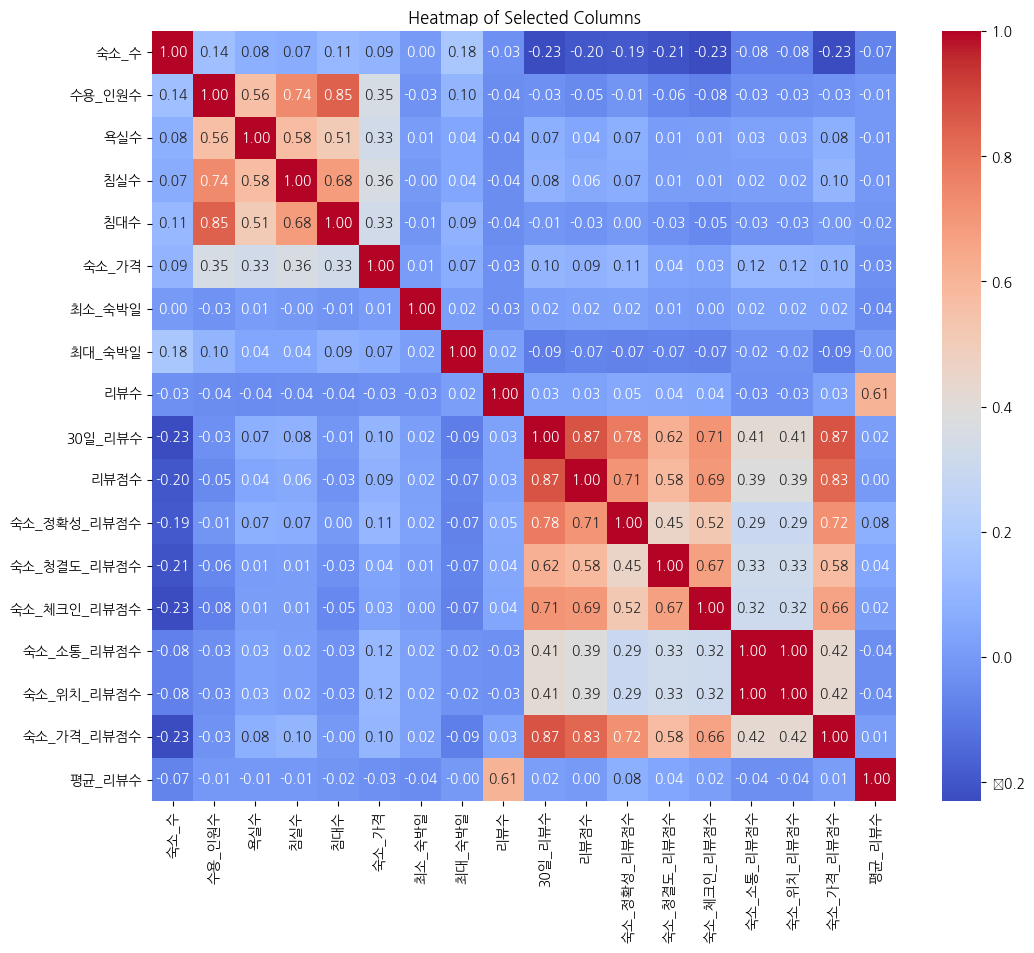

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


# 관심 있는 컬럼 선택
selected_columns = df[[ '숙소_수', '수용_인원수', 
                      '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일', 
                      '리뷰수', '30일_리뷰수', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수']]

# 상관관계 매트릭스 계산
corr_matrix = selected_columns.corr()

# 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Selected Columns')
plt.show()

     숙소_id  호스트_id 슈퍼호스트  숙소_수           숙소_지역            숙소_유형  수용_인원수  \
2     5396    7903     f   3.0  Hôtel-de-Ville  Entire home/apt       2   
4    39948  171483     t   2.0          Bourse     Private room       2   
17  171159  193142     f   3.0          Élysée  Entire home/apt       2   
39  192162  909793     t   4.0        Panthéon  Entire home/apt       2   
43  193632  777533     t   3.0          Temple  Entire home/apt       2   

         욕실수       침실수       침대수  ... 리뷰수  30일_리뷰수  리뷰점수  숙소_정확성_리뷰점수  \
2   1.000000  0.000000  1.000000  ...   5     4.60  4.63         4.57   
4   1.208763  1.339572  1.755129  ...   3     4.86  4.93         4.82   
17  1.000000  0.000000  1.000000  ...   4     4.32  4.54         4.20   
39  1.208763  1.000000  1.755129  ...   7     4.84  4.87         4.86   
43  1.000000  0.000000  1.000000  ...   3     4.67  4.68         4.65   

    숙소_청결도_리뷰점수  숙소_체크인_리뷰점수  숙소_소통_리뷰점수  숙소_위치_리뷰점수  숙소_가격_리뷰점수  평균_리뷰수  
2          4.81         4.84       

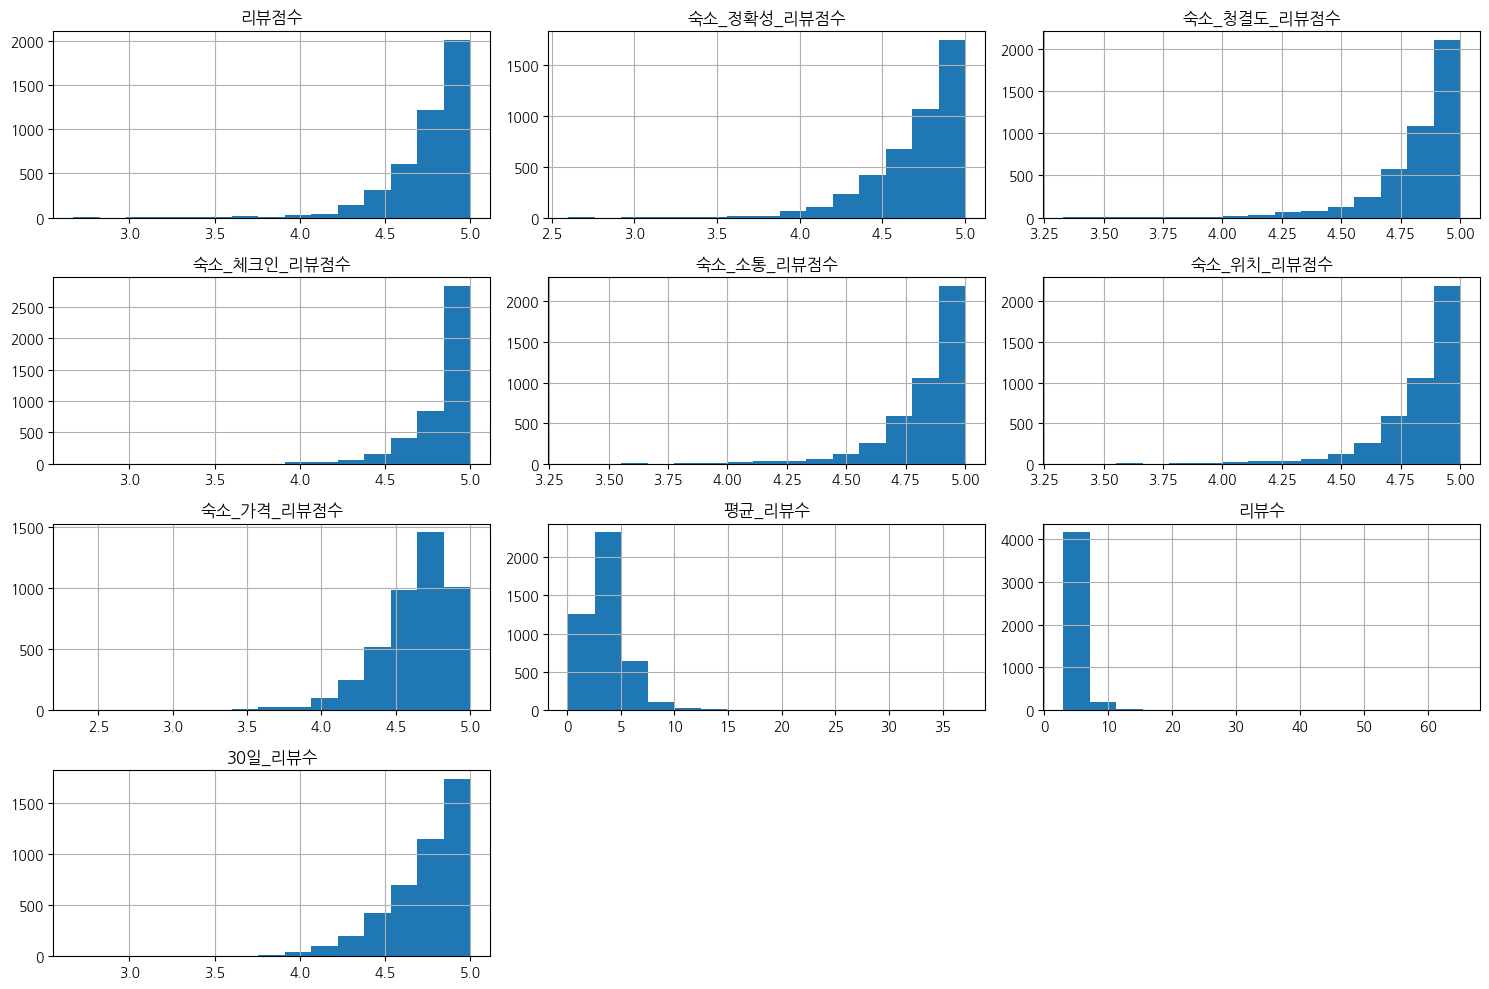

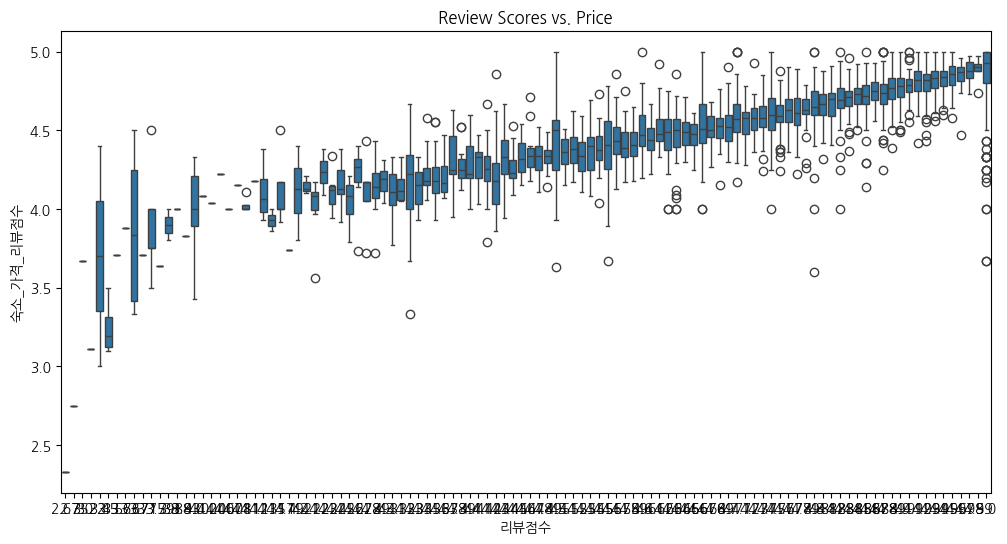

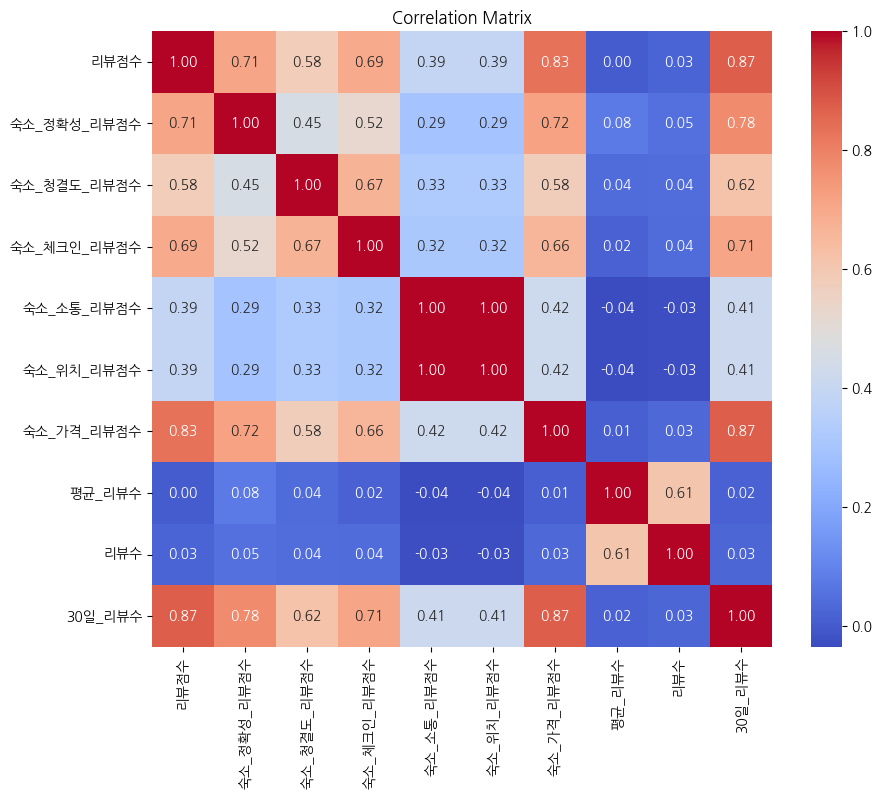

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터의 첫 5행을 출력하여 구조 확인
print(df.head())

# 기초 통계량 확인
print(df.describe())

# 결측치 확인
print(df.isnull().sum())

# 데이터 타입 확인
print(df.dtypes)

# 데이터 분포 시각화하기
# 숫자형 변수들의 분포를 히스토그램으로 표현
numerical_columns = [ '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수', '리뷰수', '30일_리뷰수']
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

# 범주형 변수 시각화
# 예: 리뷰 점수 별 숙소 가격의 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(x='리뷰점수', y='숙소_가격_리뷰점수', data=df)
plt.title('Review Scores vs. Price')
plt.show()

# 상관 관계 분석
corr = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


이상치

In [16]:
import pandas as pd


# IQR 계산
Q1 = df['리뷰점수'].quantile(0.25)
Q3 = df['리뷰점수'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 필터링
outliers = df[(df['리뷰점수'] < lower_bound) | (df['리뷰점수'] > upper_bound)]
print("이상치 값:\n", outliers)


이상치 값:
                      숙소_id     호스트_id 슈퍼호스트   숙소_수            숙소_지역  \
16289             19505637  136977671     f    1.0            Opéra   
29304             39219961  344347408     f    3.0            Passy   
32017             43475865  496378886     f  106.0       Popincourt   
33468             45557396  367980677     f    5.0     Observatoire   
35896             50583355  309243009     f   47.0        Vaugirard   
...                    ...        ...   ...    ...              ...   
80335  1091914460720141379  519533271     f  144.0     Observatoire   
80439  1091987824765107600   99044622     f    8.0         Gobelins   
80493  1092729311112338378  562354315     f    1.0            Opéra   
80565  1092831055424192936  373587457     f    3.0            Opéra   
80674  1092654568867671922  464019948     f  106.0  Buttes-Chaumont   

                 숙소_유형  수용_인원수  욕실수  침실수       침대수  ... 리뷰수  30일_리뷰수  리뷰점수  \
16289  Entire home/apt       2  1.0  0.0  1.000000  ...   3  

주성분 분석

Explained variance ratio: [0.49824521 0.1667932 ]
      Principal Component 1  Principal Component 2
0                  0.419396              -0.789141
1                 -1.681869              -1.288050
2                  3.032189              -0.103728
3                 -1.634032               0.795501
4                 -0.163595              -0.474590
...                     ...                    ...
4366              -1.924810               2.248640
4367              -2.894293              -0.098372
4368              -2.879776              -0.699583
4369               2.526564              -1.666060
4370              -2.879776              -0.699583

[4371 rows x 2 columns]


C:\Users\evol0\AppData\Local\Temp\ipykernel_10028\910886677.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


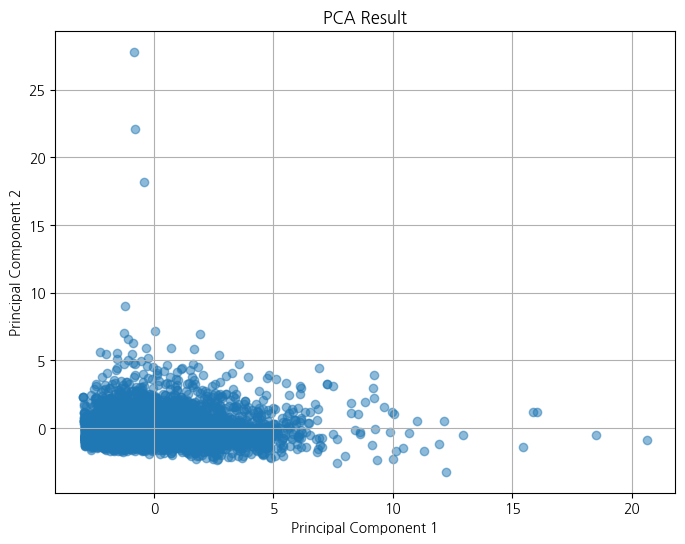

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 불러오기
data = df # 데이터셋 파일 경로를 정확히 입력하세요.

# 수치형 칼럼 선택
numerical_columns = ['리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수', '리뷰수', '30일_리뷰수']
# 수치형 칼럼에서 결측치를 평균값으로 대체
for column in numerical_columns:
    data[column].fillna(data[column].mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

# PCA 모델 생성 및 학습
pca = PCA(n_components=2)  # 2차원으로 차원 축소
principal_components = pca.fit_transform(data_scaled)

# 주성분 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# 설명된 분산 비율 출력
print('Explained variance ratio:', pca.explained_variance_ratio_)

# 주성분 데이터프레임 출력
print(pca_df)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid(True)
plt.show()


In [21]:
pca.explained_variance_ratio_

array([0.49824521, 0.1667932 ])

In [22]:
sum(pca.explained_variance_ratio_)

0.6650384139039055

In [19]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4371 entries, 2 to 83393
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        4371 non-null   int64  
 1   호스트_id       4371 non-null   int64  
 2   슈퍼호스트        4371 non-null   object 
 3   숙소_수         4371 non-null   float64
 4   숙소_지역        4371 non-null   object 
 5   숙소_유형        4371 non-null   object 
 6   수용_인원수       4371 non-null   int64  
 7   욕실수          4371 non-null   float64
 8   침실수          4371 non-null   float64
 9   침대수          4371 non-null   float64
 10  어메너티         4371 non-null   object 
 11  숙소_가격        4371 non-null   float64
 12  최소_숙박일       4371 non-null   int64  
 13  최대_숙박일       4371 non-null   int64  
 14  리뷰수          4371 non-null   int64  
 15  30일_리뷰수      4371 non-null   float64
 16  리뷰점수         4371 non-null   float64
 17  숙소_정확성_리뷰점수  4371 non-null   float64
 18  숙소_청결도_리뷰점수  4371 non-null   float64
 19  숙소_체크인_리뷰점

In [15]:
#pip install mlxtend


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\evol0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


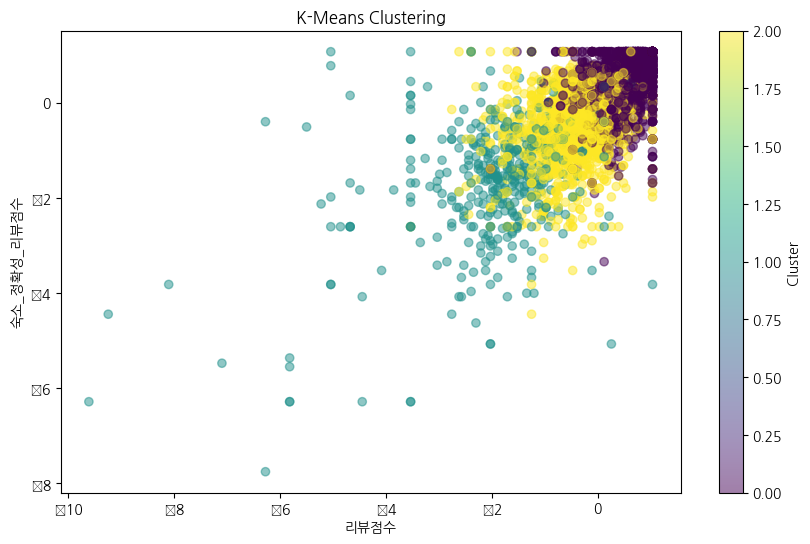

             리뷰점수  숙소_정확성_리뷰점수  숙소_청결도_리뷰점수  숙소_체크인_리뷰점수  숙소_소통_리뷰점수  \
Cluster                                                                
0        4.903070     4.859963     4.918586     4.938886    4.907341   
1        4.341024     4.254881     4.506595     4.500714    4.594429   
2        4.685079     4.593636     4.763656     4.787635    4.786963   

         숙소_위치_리뷰점수  숙소_가격_리뷰점수    평균_리뷰수       리뷰수   30일_리뷰수  
Cluster                                                        
0          4.907341    4.797287  3.613005  4.194821  4.889437  
1          4.594429    4.144524  3.272286  3.857143  4.254071  
2          4.786963    4.515896  3.832246  4.351120  4.617668  


In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 로드
data = df  # 데이터셋 파일 경로를 정확히 입력하세요.

# 사용할 수치형 칼럼 선택
columns = ['리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', 
                      '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', 
                      '평균_리뷰수', '리뷰수', '30일_리뷰수']

# 결측치 처리
data.dropna(subset=columns, inplace=True)  # 선택한 칼럼에서 결측치가 있는 행 제거

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

# KMeans 모델 생성 및 학습
kmeans = KMeans(n_clusters=3, random_state=0)  # 군집 수를 3으로 설정
clusters = kmeans.fit_predict(data_scaled)

# 군집 결과를 원본 데이터에 추가
data['Cluster'] = clusters

# 군집 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# 군집별 통계치 출력
print(data.groupby('Cluster')[columns].mean())


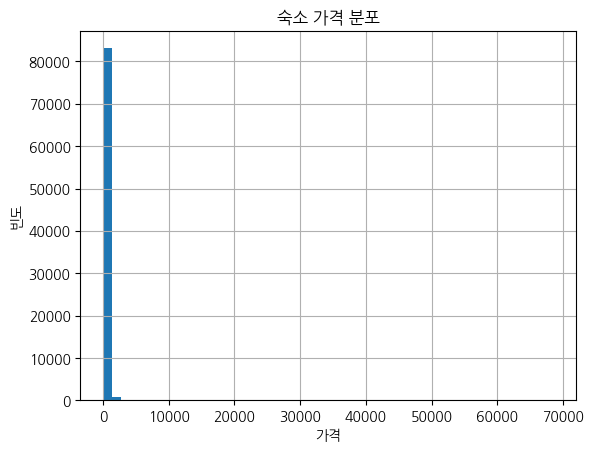

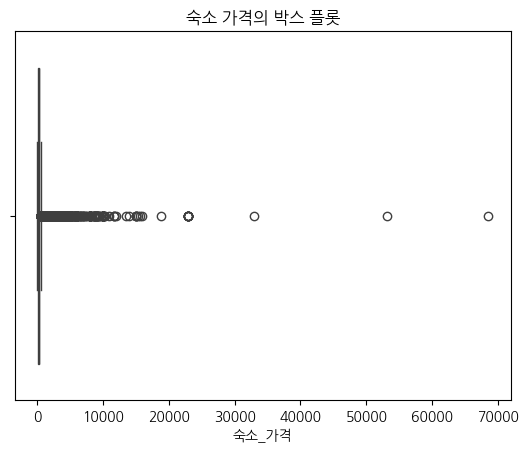

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = df

# 히스토그램으로 데이터 분포 확인
data['숙소_가격'].hist(bins=50)
plt.title('숙소 가격 분포')
plt.xlabel('가격')
plt.ylabel('빈도')
plt.show()

# 박스 플롯으로 이상치 확인
sns.boxplot(x=data['숙소_가격'])
plt.title('숙소 가격의 박스 플롯')
plt.show()


In [ ]:
# 결측치 확인
print(data.isnull().sum())

# 결측치가 있는 행을 제거
data_clean = data.dropna()

# 또는 결측치를 평균값으로 채우기
data['숙소_가격'].fillna(data['숙소_가격'].mean(), inplace=True)


숙소_id           0
호스트_id          0
슈퍼호스트          91
숙소_수            0
숙소_지역           0
숙소_유형           0
수용_인원수          0
욕실수             0
침실수             0
침대수             0
어메너티            0
숙소_가격           0
최소_숙박일          0
최대_숙박일          0
리뷰수             0
30일_리뷰수         0
리뷰점수            0
숙소_정확성_리뷰점수     0
숙소_청결도_리뷰점수     0
숙소_체크인_리뷰점수     0
숙소_소통_리뷰점수      0
숙소_위치_리뷰점수      0
숙소_가격_리뷰점수      0
평균_리뷰수          0
Cluster         0
dtype: int64


C:\Users\evol0\AppData\Local\Temp\ipykernel_18052\4080568642.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['숙소_가격'].fillna(data['숙소_가격'].mean(), inplace=True)


In [ ]:
Q1 = data['숙소_가격'].quantile(0.25)
Q3 = data['숙소_가격'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# 이상치 필터링 및 결과 확인
outliers = data[(data['숙소_가격'] < lower) | (data['숙소_가격'] > upper)]
print(outliers)


                     숙소_id     호스트_id 슈퍼호스트  숙소_수              숙소_지역  \
51                   55239     260696     f   2.0             Élysée   
57                   57766     275667     f  10.0          Vaugirard   
86                   17994      69389     f   1.0             Louvre   
94                   20823      73530     f   4.0           Panthéon   
101                  21194      73530     f   4.0           Panthéon   
...                    ...        ...   ...   ...                ...   
84359  1112080904244778091  522138202     f  50.0         Popincourt   
84368  1112383473118603487    6597900     f   1.0             Bourse   
84370  1112394711037560081    4734909     f   4.0  Buttes-Montmartre   
84376  1112402835713158061    6913332     f   1.0         Popincourt   
84382  1112437158808210396  555939881     f  17.0          Vaugirard   

                 숙소_유형  수용_인원수  욕실수  침실수  침대수  ...   30일_리뷰수      리뷰점수  \
51     Entire home/apt       4  2.0  1.0  1.0  ...  5.000000 

In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('변수 간의 상관 관계 행렬')
plt.show()


ValueError: could not convert string to float: 'f'

c:\Users\evol0\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
C:\Users\evol0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


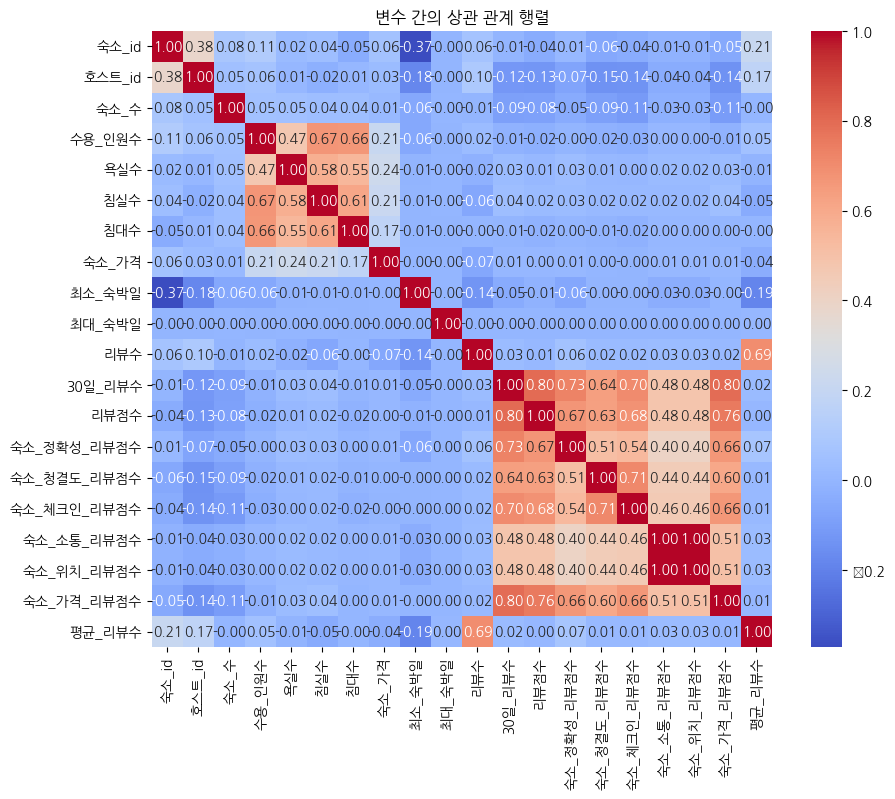

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
data = df

# 수치형 데이터만 선택
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
correlation_matrix = numeric_data.corr()

# 히트맵으로 상관 관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('변수 간의 상관 관계 행렬')
plt.show()


C:\Users\evol0\AppData\Local\Temp\ipykernel_10028\2047853406.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns] = data[columns].fillna(data[columns].mean())


Explained variance ratio: [0.28057593 0.17941162]
   Principal Component 1  Principal Component 2
0              -2.027043              -1.130008
1              -0.526164              -1.715543
2              -0.278922              -1.858510
3               1.072676              -0.502978
4              -1.359229              -0.450233


C:\Users\evol0\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


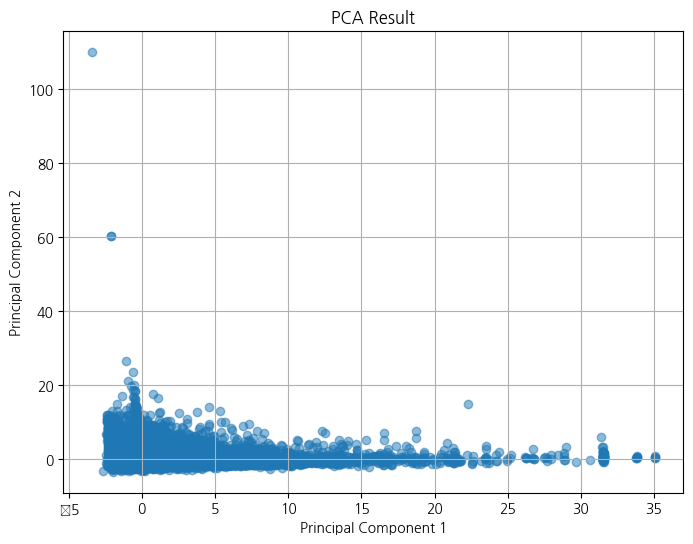

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 로드
data =  df # 데이터셋 파일 경로를 정확히 입력하세요.

# 수치형 칼럼 선택
columns = ['수용_인원수', '욕실수', '침실수', '침대수', '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수', '평균_리뷰수', 
           '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']

# 결측치 처리
data[columns] = data[columns].fillna(data[columns].mean())

# 데이터 표준화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns])

# PCA 모델 생성 및 학습
pca = PCA(n_components=2)  # 2차원으로 차원 축소
principal_components = pca.fit_transform(data_scaled)

# 주성분 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# 설명된 분산 비율 출력
print('Explained variance ratio:', pca.explained_variance_ratio_)

# 주성분 데이터프레임 출력
print(pca_df.head())

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid(True)
plt.show()
